<font color = green >

# Home task

</font>

## Titanic - Machine Learning from Disaster

Predict survival on the [Titanic](https://www.kaggle.com/c/titanic)

In [42]:
import numpy as np
import pandas as pd
import os 

In [43]:
cwd = os.getcwd()
path = os.path.join(cwd, 'data')

### Load train dataset

In [44]:
def get_train_set():
    print('Loading data...')
    
    fp = os. path.join(path, 'train.csv')
    df_train = pd.read_csv(fp,)
    df_train.set_index('PassengerId', inplace=True)
    return df_train
    
df_train = get_train_set()
df_train

Loading data...


,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...
887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S


### Load test dataset

In [45]:
def get_test_set():
    print('Loading data...')
    
    fp = os.path.join(path, 'test.csv')
    df_test = pd.read_csv(fp)
    df_test.set_index('PassengerId', inplace=True)
    return df_test

df_test = get_test_set()
df_test

Loading data...


,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,
892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S
...,...,...,...,...,...,...,...,...,...,...
1305,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S
1306,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C
1307,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S


In [46]:
df_train.isna().any()

Survived    False
Pclass      False
Name        False
Sex         False
Age          True
SibSp       False
Parch       False
Ticket      False
Fare        False
Cabin        True
Embarked     True
dtype: bool

In [47]:
df_test.isna().any()

Pclass      False
Name        False
Sex         False
Age          True
SibSp       False
Parch       False
Ticket      False
Fare         True
Cabin        True
Embarked    False
dtype: bool

### Clean datasets from Nan values

In [48]:
def clean_blank_target(df):
    # Cabin we not use for learn model
    print('Cleaning data...')
    df.dropna(subset=['Age', 'Embarked', 'Fare'], inplace=True)
    return df

df_train = clean_blank_target(df_train)
df_test = clean_blank_target(df_test)

Cleaning data...
Cleaning data...


In [49]:
df_train.isna().any()

Survived    False
Pclass      False
Name        False
Sex         False
Age         False
SibSp       False
Parch       False
Ticket      False
Fare        False
Cabin        True
Embarked    False
dtype: bool

In [50]:
df_test.isna().any()

Pclass      False
Name        False
Sex         False
Age         False
SibSp       False
Parch       False
Ticket      False
Fare        False
Cabin        True
Embarked    False
dtype: bool

### Load gender_submission dataset

In [51]:
def get_gender_submission_set():
    print('Loading data...')
    
    fp = os.path.join(path, 'gender_submission.csv')
    df_gender_submission = pd.read_csv(fp, low_memory=False)
    df_gender_submission.set_index('PassengerId', inplace=True)
    return df_gender_submission

df_gender_submission = get_gender_submission_set()
df_gender_submission.head()

Loading data...


,Survived
PassengerId,
892,0
893,1
894,0
895,0
896,1


In [52]:
df_gender_submission.isna().any()

Survived    False
dtype: bool

### Merge df and gender_submission datasets

In [53]:
def merge_additional_dataset(df, df_gender_submission):
    print('Merging data...')
    df = pd.merge(df_test, df_gender_submission, left_index=True, right_index=True)
    return df
df_train = merge_additional_dataset(df_train, df_gender_submission)
df_train

Merging data...


,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Survived
PassengerId,,,,,,,,,,,
892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q,0
893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S,1
894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q,0
895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S,0
896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S,1
...,...,...,...,...,...,...,...,...,...,...,...
1301,3,"Peacock, Miss. Treasteall",female,3.0,1,1,SOTON/O.Q. 3101315,13.7750,NaN,S,1
1303,1,"Minahan, Mrs. William Edward (Lillian E Thorpe)",female,37.0,1,0,19928,90.0000,C78,Q,1
1304,3,"Henriksson, Miss. Jenny Lovisa",female,28.0,0,0,347086,7.7750,NaN,S,1


### Leaves relevant features

 - Pclass is an important feature because it shows the status and wealth of a person

 - Name is an unimportant feature

 - Sex is an important feature because women often survive more often than men

 - Age is also an important feature, as children and old people have advantages

 - SibSP is a feature that can indicate marital status, which can help you survive

 - Parch this feature is similar to SibSP and reflects marital status

 - Ticket is not an important feature

 - Fare is an important feature that reflects the passenger's class

 - Cabin this feature is not important because most of the values are NaN, and the cabin number overlaps with the Pclass feature and so there may be duplicate values that will interfere with training

 - Embarked this feature can indicate social status, which can help you survive

In [54]:
def get_X_train_test(df_train, df_test):
    print('Getting X_train and X_test...')
    
    cols_needs=[
        'Pclass',
        'Sex',
        'Age',
        'SibSp',
        'Parch',
        'Fare',
        'Embarked'
    ]
    X_train = df_train[cols_needs]
    X_test = df_test[cols_needs]
    return X_train, X_test

X_train, X_test = get_X_train_test(df_train, df_test)

X_train.shape, X_test.shape

Getting X_train and X_test...


((331, 7), (331, 7))

### Encoder non-numeric features to numeric

In [55]:
X_train.dtypes

Pclass        int64
Sex          object
Age         float64
SibSp         int64
Parch         int64
Fare        float64
Embarked     object
dtype: object

In [56]:
from sklearn.preprocessing import LabelEncoder

def encode_columns(X_train, X_test):
    print('Encoding data...')
    
    columns_encode = [
    'Age',
    'Sex',
    'Embarked'
    ]
    X_train = X_train.copy()
    X_test = X_test.copy()
    
    
    for col in columns_encode:
        if col == 'Age':
            X_train[col] = X_train[col].astype(float)
            X_test[col] = X_test[col].astype(float)
            continue
        
        le_encorder = LabelEncoder().fit(X_train[col].astype(str))
        X_train[col] = le_encorder.transform(X_train[col].astype(str))
        X_test[col] = le_encorder.transform(X_test[col].astype(str))
    return X_train, X_test

X_train, X_test = encode_columns(X_train, X_test)
X_train.dtypes

Encoding data...


Pclass        int64
Sex           int32
Age         float64
SibSp         int64
Parch         int64
Fare        float64
Embarked      int32
dtype: object

### Normalize features

In [57]:
from sklearn.preprocessing import MinMaxScaler

def normalize(X_train, X_test):
    print('Normalizing data...')
    
    scaler = MinMaxScaler()
    X_train_scaled = scaler.fit_transform(X_train)
    X_test_scaled = scaler.transform(X_test)
    return X_train_scaled, X_test_scaled

X_train_scaled, X_test_scaled = normalize(X_train, X_test)

Normalizing data...


### Execute all preprocessing to learn model

In [58]:
def apply_preprocessing_to_learn(df_train, df_test):
    df_train = clean_blank_target(df_train)
    df_test = clean_blank_target(df_test)
    y_train = df_train['Survived']
    y_test = df_test['Survived']
    
    X_train, X_test = get_X_train_test(df_train, df_test)
    
    X_train, X_test = encode_columns(X_train, X_test)
    
    X_train_scaled, X_test_scaled = normalize(X_train, X_test)
    
    return X_train_scaled, X_test_scaled, y_train, y_test

### Split train dataset to train

In [59]:
from sklearn.model_selection import train_test_split

df = get_train_set()
df_train, df_test = train_test_split(df, random_state=0)
X_train_scaled, X_test_scaled, y_train, y_test = apply_preprocessing_to_learn(df_train, df_test)

print ('X_train_scaled shape= {}\nX_test_scaled shape= {}'.format(X_train_scaled.shape, X_test_scaled.shape))
print ('y_train set shape= {}\ny_test set shape= {}'.format(y_train.shape, y_test.shape))

Loading data...
Cleaning data...
Cleaning data...
Getting X_train and X_test...
Encoding data...
Normalizing data...
X_train_scaled shape= (533, 7)
X_test_scaled shape= (179, 7)
y_train set shape= (533,)
y_test set shape= (179,)


### Train model

In [60]:
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import GridSearchCV

In [61]:
clf = MLPClassifier(max_iter=10000, random_state=0)
grid_values = {'alpha' : [0.001, 0.01, 0.1, 1, 10]}

print ('Running GridSearchCV.')
grid_clf = GridSearchCV(clf, param_grid=grid_values,scoring='f1')
grid_clf.fit(X_train_scaled, y_train)
print('Grid best parameter (max f1 ): ', grid_clf.best_params_) 
print('Grid best score (f1): ', grid_clf.best_score_) 
test_score= grid_clf.score(X_test_scaled, y_test)
print("test f1= {}".format(test_score))


Running GridSearchCV.


Grid best parameter (max f1 ):  {'alpha': 0.01}
Grid best score (f1):  0.7379718585728507
test f1= 0.7851851851851853


### Execute all preprocessing

In [62]:
def apply_preprocessing(df_train, df_test):
    df_gender_submission = get_gender_submission_set()
    
    df_train = clean_blank_target(df_train)
    df_test = clean_blank_target(df_test)
    
    df_test = merge_additional_dataset(df_test, df_gender_submission)
    
    y_train = df_train['Survived']
    y_test = df_test['Survived']
    
    X_train, X_test = get_X_train_test(df_train, df_test)
    
    X_train, X_test = encode_columns(X_train, X_test)
    
    X_train_scaled, X_test_scaled = normalize(X_train, X_test)
    
    return X_train_scaled, X_test_scaled, y_train, y_test

## Running on provided Train and Test sets

### Load provided train and test sets

In [63]:
df_train = get_train_set()
df_test = get_test_set()

X_train_scaled_1, X_test_scaled_1, y_train_1, y_test_1 = apply_preprocessing(df_train, df_test)

print ('X_train_scaled shape= {}\nX_test_scaled shape= {}'.format(X_train_scaled_1.shape, X_test_scaled_1.shape))
print ('y_train set shape= {}'.format(y_train_1.shape))
print ('y_test type = {}'.format(type(y_test_1)))

Loading data...
Loading data...
Loading data...
Cleaning data...
Cleaning data...
Merging data...
Getting X_train and X_test...
Encoding data...
Normalizing data...
X_train_scaled shape= (712, 7)
X_test_scaled shape= (331, 7)
y_train set shape= (712,)
y_test type = <class 'pandas.core.series.Series'>


### Predict the test set

In [64]:
from sklearn.model_selection import cross_val_score

In [65]:
clf = MLPClassifier(max_iter=10000, random_state=0, alpha=0.01)

f1_train = cross_val_score(clf, X_train_scaled_1, y_train_1, cv=5, scoring='f1')
print('f1_train = {}'.format(f1_train))

clf.fit(X_train_scaled_1, y_train_1)
y_predict = clf.predict(X_test_scaled_1)

np.mean(y_predict)

f1_train = [0.69902913 0.78095238 0.72566372 0.67391304 0.8245614 ]


0.36253776435045315

### Features importance

In [66]:
import matplotlib.pyplot as plt

In [67]:
def plot_feature_importances(clf, features):
    weights = clf.coefs_[0]
    features_weights = np.sum(weights, axis=1)
    features_weights_dict = dict(zip(features, features_weights))
    
    plt.figure(figsize=(10, 6))
    plt.bar(features, features_weights, color='blue')
    plt.xlabel('Features')
    plt.ylabel('Weights')
    plt.title('Feature Weights in MLPClassifier')
    plt.xticks(rotation=45, ha='right')

    plt.tight_layout()
    plt.show()


In [76]:
clf = MLPClassifier(max_iter=10000, random_state=0, alpha=0.01).fit(X_train_scaled_1, y_train_1)

MLP accuracy= 88.218%


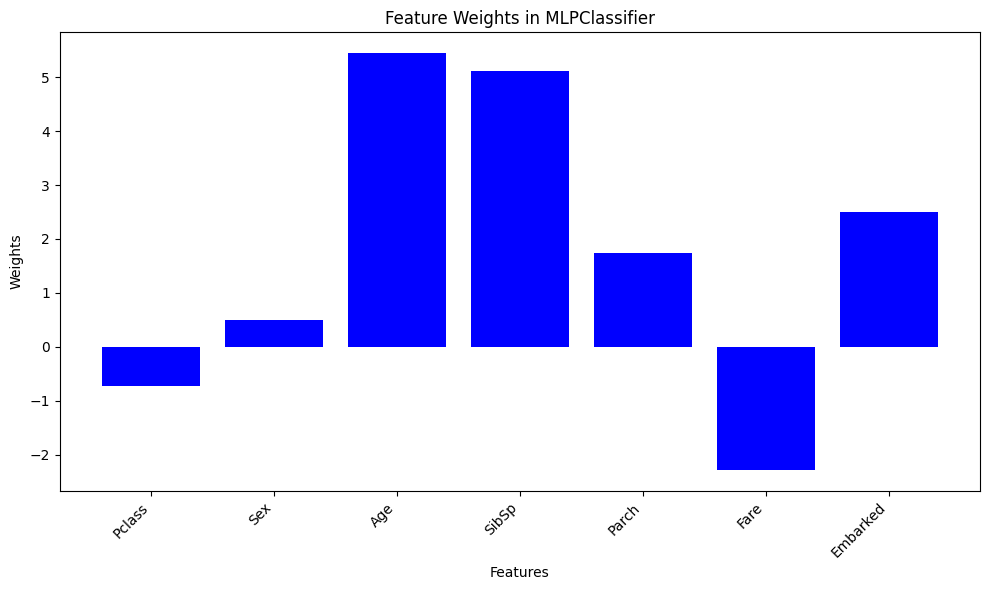

In [77]:
print("MLP accuracy= {:.3%}".format(clf.score (X_test_scaled_1, y_test_1)))

features = [
    'Pclass',
    'Sex',
    'Age',
    'SibSp',
    'Parch',
    'Fare',
    'Embarked'
]

plot_feature_importances(clf, features)